**Importing needed libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

**Load and Display 'image1.jpg'**

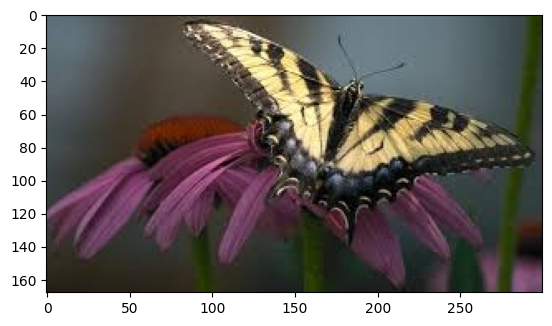

In [ ]:

# Load the image
image = cv2.imread("/Images/image1.jpg")

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

**A. Computes the difference between values in neighboring pixels and Find the number of bytes and size of the image, and display each case.**

To compute the difference between values in neighboring pixels we use two methods:

1.   with applying the Laplacian filter
2.   Sobel filter

We use the available functions for these filters in OpenCV library.

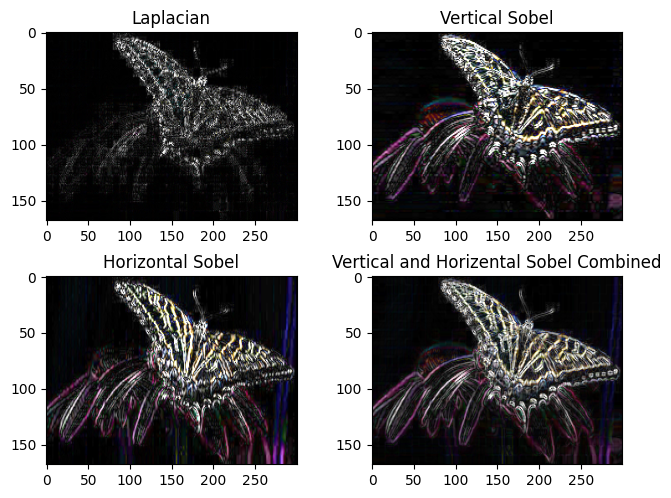

In [ ]:

# Compute the difference between values in neighboring pixels
abs_filtered_laplacian = cv2.convertScaleAbs(cv2.Laplacian(image, cv2.CV_64F))

abs_filtered_sobel_x = cv2.convertScaleAbs(cv2.Sobel(image, cv2.CV_64F, dx=0, dy=1))
abs_filtered_sobel_y = cv2.convertScaleAbs(cv2.Sobel(image, cv2.CV_64F, dx=1, dy=0))

filtered = cv2.addWeighted(abs_filtered_sobel_x, 0.5, abs_filtered_sobel_y, 0.5, 0)

# Plot the Results
fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(cv2.cvtColor(abs_filtered_laplacian, cv2.COLOR_BGR2RGB), aspect='auto')
axs[0, 1].imshow(cv2.cvtColor(abs_filtered_sobel_x, cv2.COLOR_BGR2RGB), aspect='auto')
axs[1, 0].imshow(cv2.cvtColor(abs_filtered_sobel_y, cv2.COLOR_BGR2RGB), aspect='auto')
axs[1, 1].imshow(cv2.cvtColor(filtered, cv2.COLOR_BGR2RGB), aspect='auto')

# Set the title for each subplot
axs[0, 0].set_title('Laplacian')
axs[0, 1].set_title('Vertical Sobel')
axs[1, 0].set_title('Horizontal Sobel')
axs[1, 1].set_title('Vertical and Horizental Sobel Combined')

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.3, hspace=0.3)

plt.show()

In [ ]:
# Determine the number of bytes and size of the image
num_pixels = image.shape[0] * image.shape[1]
bytes_per_pixel = image.shape[2]
num_bytes = num_pixels * bytes_per_pixel
image_size = num_pixels * image.itemsize

print("Number of bytes:", num_bytes)
print("Image size:", image_size, 'pixels')

Number of bytes: 151200
Image size: 50400 pixels


**B. Representation the image with unit-8 data type, default type (float 64) and by adding bias (128) and plot it.**

<ipython-input-18-56343be3bdfa>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  biased_image = np.minimum(biased_image, 255* np.ones(biased_image.shape, dtype=np.int))


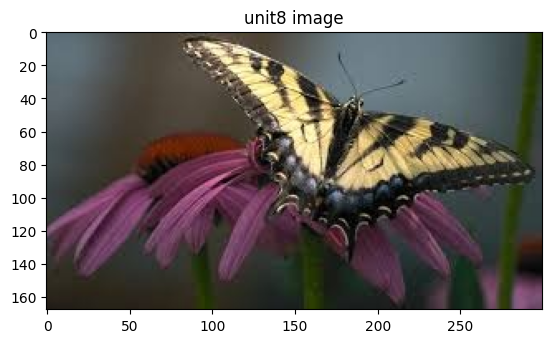

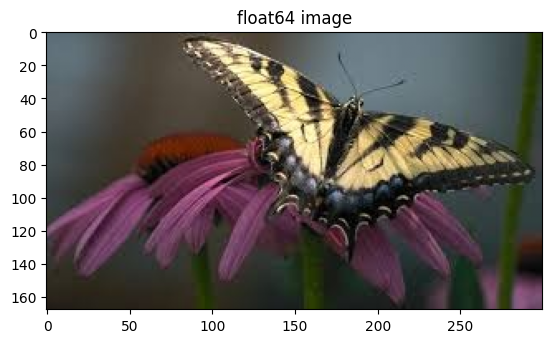

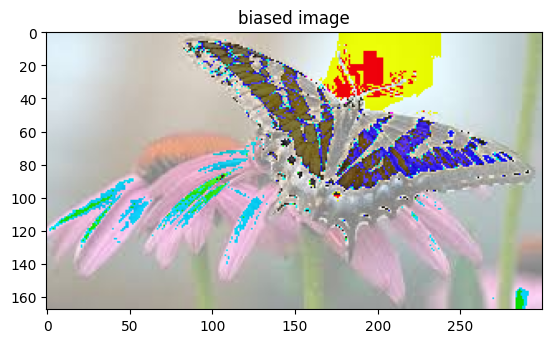

In [ ]:

# Represent the image using a unit-8 data type
unit8_image = np.uint8(image)

# Represent the image using a float64 data type
float64_image = np.float64(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))/ 255.0

# Step 7: Add a bias of 128 to the pixel values
biased_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) + 128

# Step 8: Display the images
plt.imshow(cv2.cvtColor(unit8_image, cv2.COLOR_BGR2RGB))
plt.title('unit8 image')
plt.show()

plt.imshow(float64_image)
plt.title('float64 image')
plt.show()

plt.imshow(biased_image)
plt.title('biased image')
plt.show()

**C. How many bits can manage so that we still have a good image? Plot all of the cases.**

First we compute the optimal bit depth for this image. After that we try uniform quantization for some different values for the number of bits per pixel.

In [ ]:

# Step 9: Determine the optimal bit depth
dynamic_range = np.max(image) - np.min(image)
optimal_bit_depth = np.ceil(np.log2(dynamic_range))
print("Optimal bit depth:", optimal_bit_depth)


Optimal bit depth: 8.0


Implemntation of a function to compute uniform quantization.

In [ ]:
def uniform_quantization(num_bits):
    # Calculate the quantization step size
    step_size = 2**(8 - num_bits)

    # Apply uniform quantization
    quantized_image = (image // step_size) * step_size

    # Convert the quantized image back to unit-8 data type
    quantized_image = quantized_image.astype(np.uint8)

    # Display the image
    plt.imshow(cv2.cvtColor(quantized_image, cv2.COLOR_BGR2RGB))
    plt.show()

    # Calculate the new number of bytes used to store the image
    quantized_bits = num_bits * image.shape[0] * image.shape[1] * image.shape[2]
    quantized_bytes = quantized_bits / 8

    print("New number of bytes:", quantized_bytes)


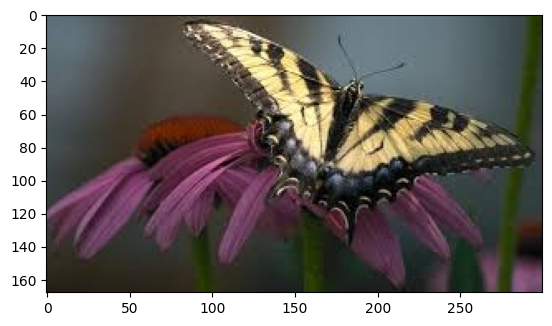

New number of bytes: 151200.0


In [ ]:
uniform_quantization(8)

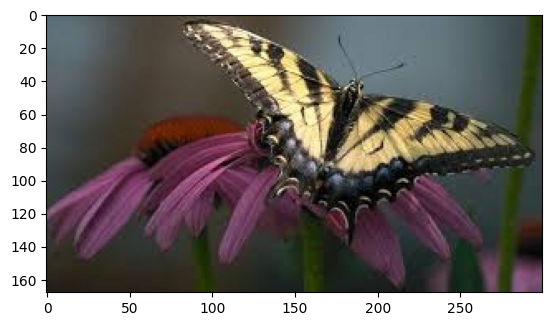

New number of bytes: 132300.0


In [ ]:
uniform_quantization(7)

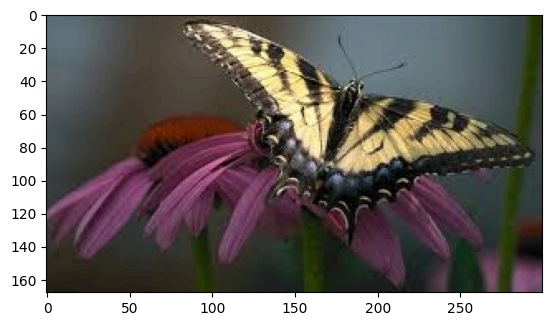

New number of bytes: 113400.0


In [ ]:
uniform_quantization(6)

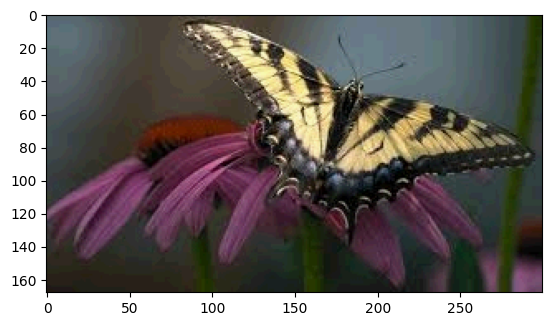

New number of bytes: 94500.0


In [ ]:
uniform_quantization(5)

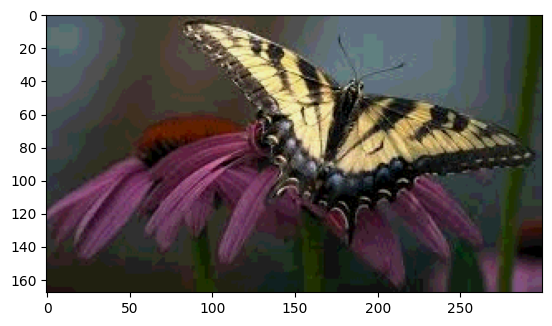

New number of bytes: 75600.0


In [ ]:
uniform_quantization(4)

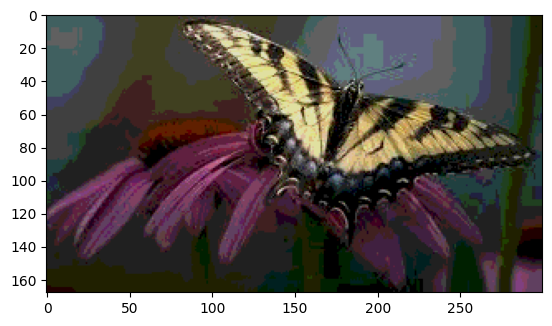

New number of bytes: 56700.0


In [ ]:
uniform_quantization(3)

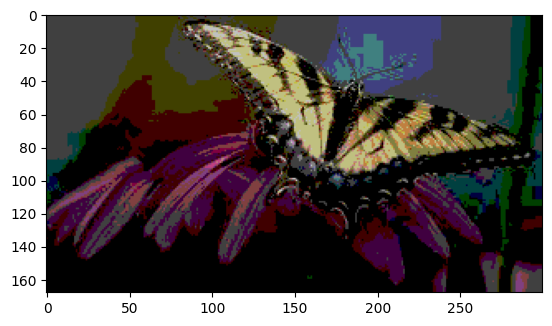

New number of bytes: 37800.0


In [ ]:
uniform_quantization(2)

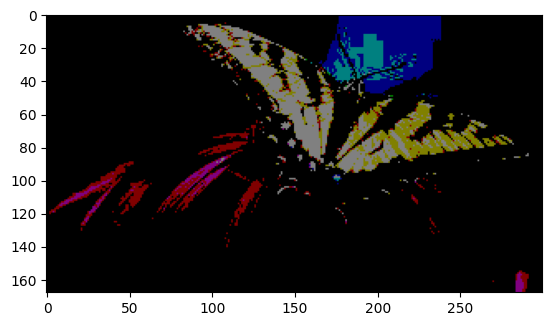

New number of bytes: 18900.0


In [ ]:
uniform_quantization(1)

As you can see in the results of uniform quantization; even with 4 bits per pixel, we can have enough information about the objects in the image. If we compare the best image (meaning the one with 8 bit per pixel) with other images we can't see a lot of difference between that and the next two. As a result we can say that the image with 6 bits per pixel is considered a good image.